In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn
import sklearn.linear_model
from sklearn import linear_model

mpl.rc('figure',figsize=(10,10))
mpl.rc('font',size=20)

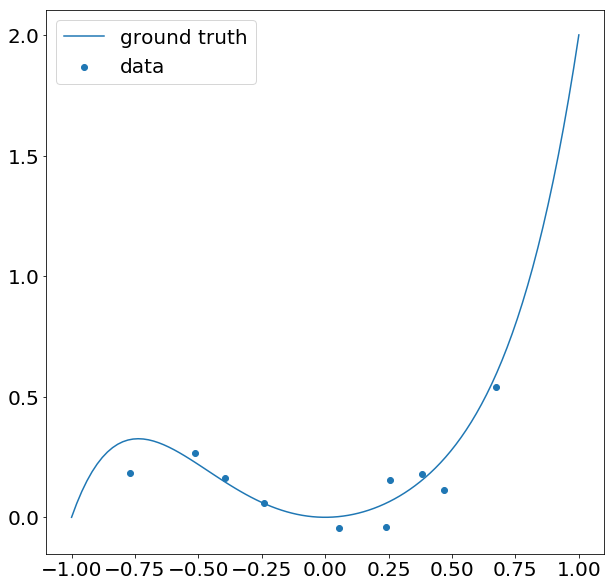

In [2]:
m_training = 10
x = np.sort(np.random.uniform(-1,1,m_training))#np.linspace(-1,1,m_training)
y = x**2 + x**5 + np.random.normal(scale = .1,size=m_training)
X = np.linspace(-1,1,100)
Y = X**2 + X**5

plt.scatter(x,y,label='data')
plt.plot(X,Y,label='ground truth')
plt.legend()
plt.show()

In [3]:
def poly_basis(X, d):
    """Returns a polynomial of degree d-1.  
    
    Args:
        X: data array, that is n
        d: degree of the polynomial
    Returns:
        coefficient matrix of the polynomials n x d """
    return np.power(np.expand_dims(X,1), np.arange(0, d))

In [4]:
poly_order = 40
A = poly_basis(x,poly_order)
answer_40 = sklearn.linear_model.LinearRegression().fit(A, y)
y_train_40 =answer_40.predict(poly_basis(X,poly_order))


poly_order = 3
A3 = poly_basis(x,poly_order)
answer_3 = sklearn.linear_model.LinearRegression().fit(A3, y)
y_train_3 =answer_3.predict(poly_basis(X,poly_order))

poly_order = 5
A5 = poly_basis(x,poly_order)
answer_5 = sklearn.linear_model.LinearRegression().fit(A5, y)
y_train_5 =answer_5.predict(poly_basis(X,poly_order))


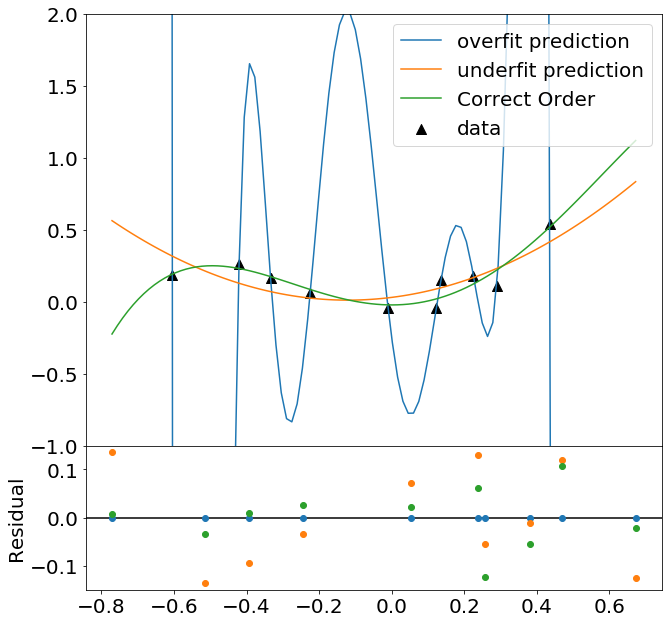

In [5]:
fig = plt.figure(1)
#Plot Data-model
frame1=fig.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.scatter(x,y,marker='^',s=100,color='k',label='data')
plt.plot(X,y_train_40,label='overfit prediction')
plt.plot(X,y_train_3,label='underfit prediction')
plt.plot(X,y_train_5,label='Correct Order')
plt.ylim([-1,2])
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.legend()
#Residual plot
difference40 = answer_40.predict(poly_basis(x,40)) - y
difference3 = answer_3.predict(poly_basis(x,3)) - y
difference5 = answer_5.predict(poly_basis(x,5)) - y
frame2=fig.add_axes((.1,.1,.8,.2))        
plt.axhline(0,color='k')
plt.plot(x,difference40,'o')
plt.plot(x,difference3,'o')
plt.plot(x,difference5,'o')
plt.ylabel('Residual')
plt.legend()

### From the residuals we can clearly see that the overfit prediction hits every point exactly, while the under fit prediction does worse than the correct order fit.

## Generate a second set of data, a test set.

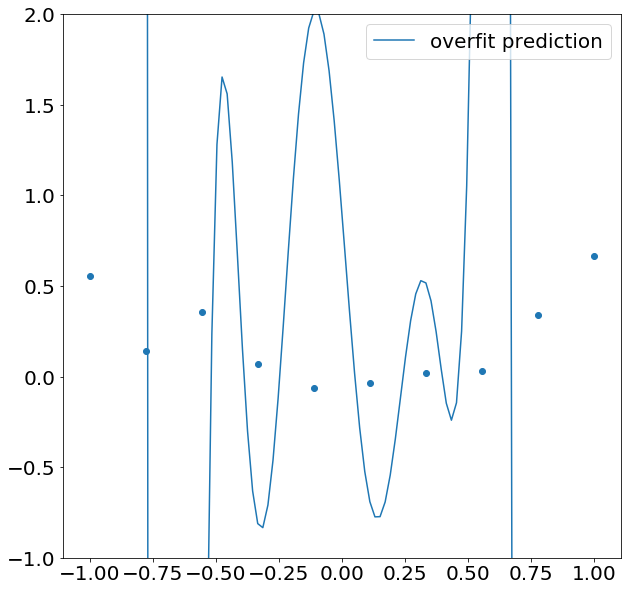

In [6]:
x_test = np.linspace(-1,1,m_training)
y_test = x**2 + x**5 + np.random.normal(scale = .1,size=m_training)
plt.scatter(x_test,y_test)
plt.plot(X,y_train_40,label='overfit prediction')
plt.legend()
plt.ylim([-1,2])

plt.show()

#### Now it misses the points :(

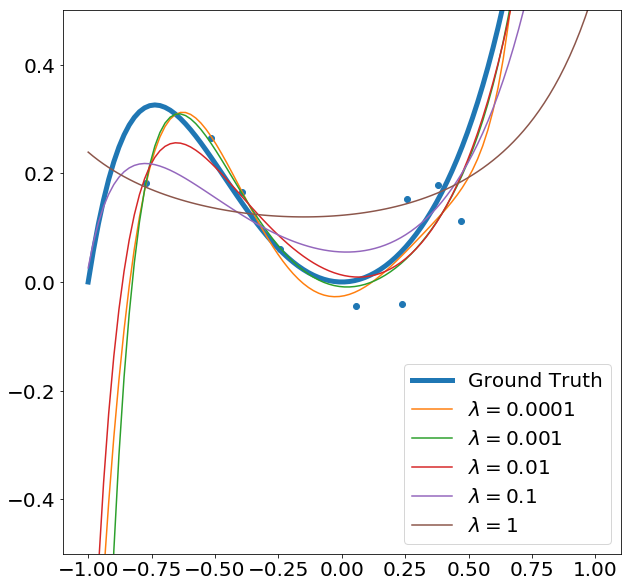

In [11]:
# Write a function to make this all go quicker
def ridge_regress_compare(x,y,n_order,lambda_reg,X):
    A = poly_basis(x,n_order)
    ridge = linear_model.Ridge(alpha=lambda_reg)
    fit = ridge.fit(A,y)
    pred = fit.predict(poly_basis(X,n_order))
    plt.plot(X,pred,label=r'$\lambda=${:}'.format(lambda_reg))
plt.scatter(x,y)
plt.plot(X,Y,label='Ground Truth',lw=5)
ridge_regress_compare(x,y,40,0.0001,X)
ridge_regress_compare(x,y,40,.001,X)
ridge_regress_compare(x,y,40,.01,X)
ridge_regress_compare(x,y,40,.1,X)
ridge_regress_compare(x,y,40,1,X)
plt.legend()
plt.ylim([-.5,.5])
plt.show()

### 2.d assessing which value of lambda is best.

To do this I'll compare the performance of each fit on a test set (really a validation set) 

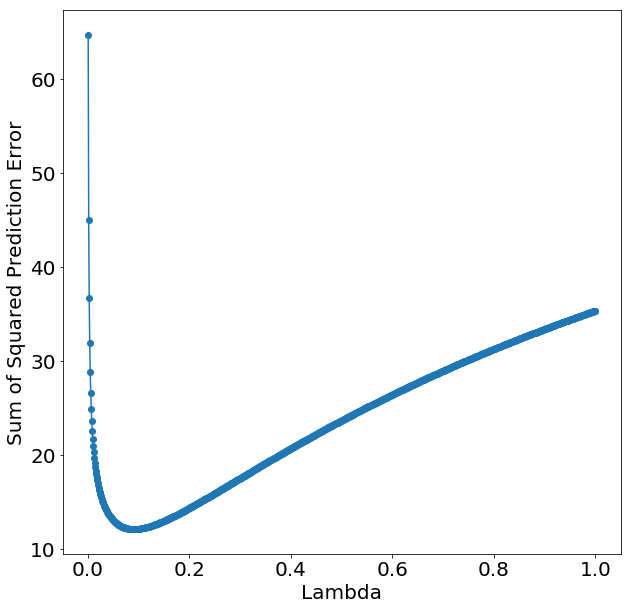

In [27]:
def get_mod(x_train,y_train, n_order, lambda_reg):
    A = poly_basis(x_train,n_order)
    ridge = linear_model.Ridge(alpha=lambda_reg)
    fit = ridge.fit(A,y)
    return fit
x_test = np.linspace(-1,1,1000)
y_test = x_test**2 + x_test**5 + np.random.normal(scale = .1,size=1000)
x = np.linspace(-1,1,m_training)
y = x**2 + x**5 + np.random.normal(scale = .1,size=m_training)
models = {}
lambdas = np.linspace(0.001,1,1000)
pred_errs =np.zeros_like(lambdas)
for i, lam in enumerate(lambdas):
    fit = get_mod(x,y,40,lambda_reg=lam)
    models['{:}'.format(lam)] = fit
    y_pred = fit.predict(poly_basis(x_test,40))
    pred_errs[i] = np.sum((y_test-y_pred)**2)
#     print('{:0.2}\t{:0.3}'.format(lam,pred_errs[i]))
plt.plot(lambdas,pred_errs,'-o')
plt.ylabel('Sum of Squared Prediction Error')
plt.xlabel('Lambda')
plt.show()

In [29]:
#Find the best lambda
print(lambdas[np.argmin(pred_errs)])

0.091


### So i find the best lambda value to be .91 and note that it makes a significant difference over a lambda of 0.


# 1. e  Lasso Regularization

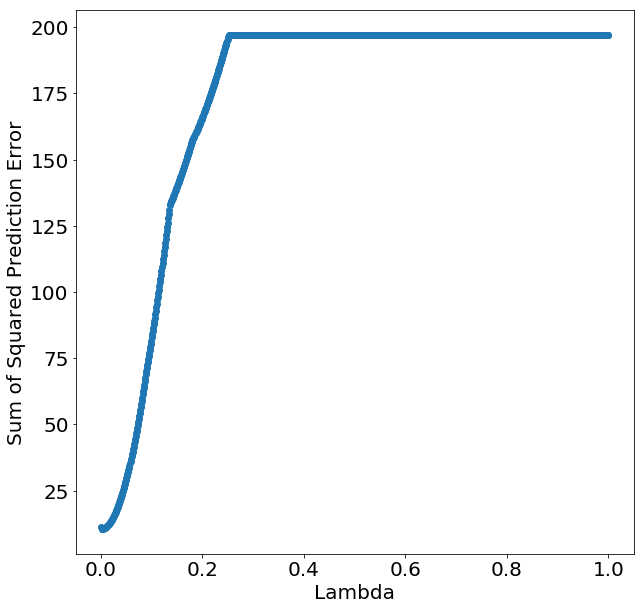

In [30]:
def get_mod_L1(x_train,y_train, n_order, lambda_reg):
    A = poly_basis(x_train,n_order)
    lasso = linear_model.Lasso(alpha=lambda_reg)
    fit = lasso.fit(A,y)
    return fit

models = {}
lambdas = np.linspace(0.001,1,1000)
pred_errs =np.zeros_like(lambdas)
for i, lam in enumerate(lambdas):
    fit = get_mod_L1(x,y,40,lambda_reg=lam)
    models['{:}'.format(lam)] = fit
    y_pred = fit.predict(poly_basis(x_test,40))
    pred_errs[i] = np.sum((y_test-y_pred)**2)
#     print('{:0.2}\t{:0.3}'.format(lam,pred_errs[i]))
plt.plot(lambdas,pred_errs,'-o')
plt.ylabel('Sum of Squared Prediction Error')
plt.xlabel('Lambda')
plt.show()

### Weird, for this L1 where things are already sparse it seems that not regularizing is best.


# 2.a 

What follows are two different approaches to averaging. The first I randomly sample some number of points from [-1,1] for my training data. I found that with the order of my polynomial > n_training_points this lead to wildly incorrect averages as below.

In [33]:
def get_new_fit_coef(n_pts = 20,order = 16):
    x = np.sort(np.random.uniform(-1,1,n_pts))
#     x = np.linspace(-1,1,n_pts)+np.random.normal(scale = .1,size=n_pts)
    y = x**2 + x**5 + np.random.normal(scale = .1,size=n_pts)
    A = poly_basis(x,order)
    fit = sklearn.linear_model.LinearRegression().fit(A, y)
    return fit.coef_
order = 50
avg_numbers = np.array([1,10,100,1000])
n_tries = avg_numbers.shape[0]
a = np.zeros([n_tries, get_new_fit_coef(order=order).shape[0]])
for i, n_avg in enumerate(avg_numbers):
    for j in range(n_avg):
        a[i] += get_new_fit_coef(order=order)
    a[i] /= n_avg


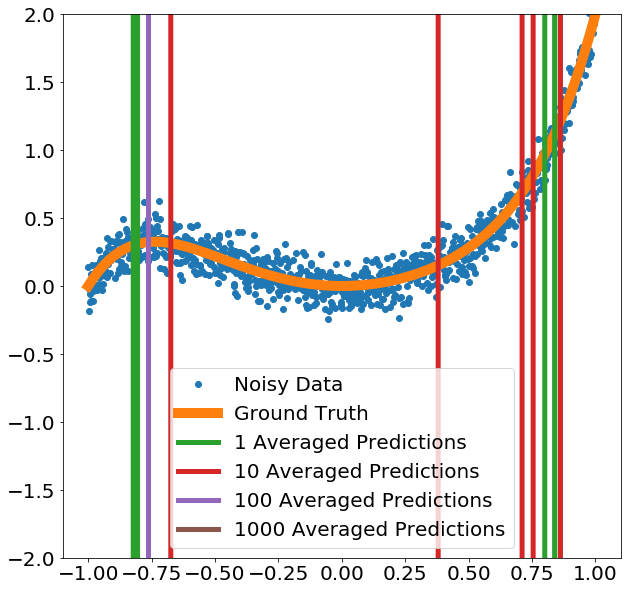

In [34]:
plt.plot(x_test,y_test,'o',label='Noisy Data')
plt.plot(X,Y,label='Ground Truth',lw=10)

for i, n_avg in enumerate(avg_numbers):
    plt.plot(x_test,np.dot(poly_basis(x_test,order),a[i].T),label='{:} Averaged Predictions'.format(n_avg),lw=5)

plt.legend()
plt.ylim([-2,2])
plt.show()

## Proper averaging:

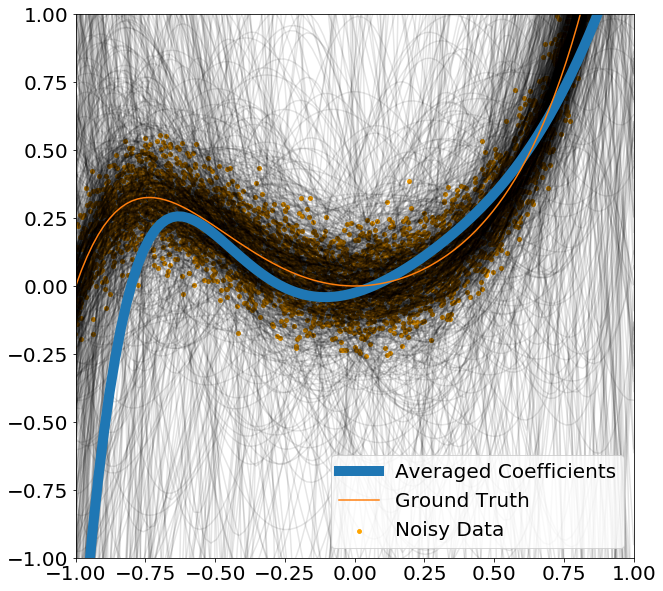

In [38]:
def get_new_fit_coef_2(n_pts = 20,order = 16):
#     x = np.random.uniform(-1,1,n_pts)
    x = np.linspace(-1,1,n_pts)+np.random.normal(scale = .2,size=n_pts)
    y = x**2 + x**5 + np.random.normal(scale = .1,size=n_pts)
    A = poly_basis(x,order)
#     fit = sklearn.linear_model.LinearRegression().fit(A, y)
    coef=np.matmul(np.linalg.pinv(A),y)[::-1]

    return x,y, coef
order = 7
n_pts = 6
N = 1000

data_x = np.zeros([N,n_pts])
data_y = np.zeros([N,n_pts])
a = np.zeros([N,get_new_fit_coef(order=order,n_pts = n_pts).shape[0]])
for j in range(N):
    out = get_new_fit_coef_2(order=order,n_pts=n_pts)
    data_x[j] = out[0]
    data_y[j] = out[1]
    a[j] += out[2]
coef = np.average(a,axis=0)
for A in a:
    plt.plot(X,np.polyval(A,X),alpha=.1,color='black')
pred = np.polyval(coef,X)#fit.predict(poly_basis(X,order))
plt.scatter(data_x.flatten(),data_y.flatten(),s=15,color = 'orange',label='Noisy Data')
plt.plot(X,pred,lw=10,label='Averaged Coefficients')
plt.plot(X,X**2+X**5,label='Ground Truth')

plt.ylim([-1,1])
plt.xlim([-1,1])
plt.legend()
plt.show()

One thing I noticed is that the distribution of points I sampled had a strong effect on the efficacy of this averaging. If i sampled points randomly from the interval [-1,1] then the averaging would lead to highly oscillatory solutions because the overfitting was so bad and points could be clustered away from the edges leading to very bad outliers that negatively impacted the averages. So i used a linspace with random jitter in X as well as in the y for my training data.

# 2. c
Following the wikipedia derivation


$ y = f +\epsilon$  
So $\operatorname{E}[y] = E[f] = f$
\begin{align}
\operatorname{E}\big[(y - f_D)^2\big]
 & = \operatorname{E}[y^2 + f_D^2 - 2 yf_D] \\
 & = \operatorname{E}[y^2] + \operatorname{E}[f_D^2] - \operatorname{E}[2yf_D] \\
 & = \operatorname{Var}[y] + \operatorname{E}[y]^2 + \operatorname{Var}[f_D] + \operatorname{E}[f_D]^2 - 2f\operatorname{E}[f_D] \\
 & = \operatorname{Var}[y] + \operatorname{Var}[f_D] + (f^2 - 2f\operatorname{E}[f_D] + \operatorname{E}[f_D]^2) \\
 & = \operatorname{Var}[y] + \operatorname{Var}[f_D] + (f - \operatorname{E}[f_D])^2 \\
 & = \sigma^2 + \operatorname{Var}[f_D] + \operatorname{Bias}[f_D]^2
\end{align}

The $\sigma$ here corresponds to the error introduced by the noise in our training set, our model can never do better than this noise.

# 2. d
The bias-variance tradeoff is essentially the tradeoff between over and underfitting. High variance corresponds to fitting all of the variance in the training set at the expense of limited generalizability. Whereas bias implies underfitting.

# 2. e
As you add more points to the training data set 


# Problem 3.


Below is all my work to do a simple grid search of the rbf kernel parameters. But the upshot is i'd choose the following paramters:

# Kernel = rbf  
# C = 31.5
# gamma = .20

Ultimately I just simulated your test and found the parameters that gave me the highest score. In a real situation I would us proper cross validation and the sklearn grid search methods.

In [58]:
from sklearn.svm import SVC
from scipy.special import jv as J # Bessel function
def f(x,y):
    return J(0,(x*x+y*y)**0.6)*x/np.sqrt(x*x+y*y)+0.1*np.cos(x)

In [59]:
def to_label(x):
    x = x.copy()
    x[x>0]=1
    x[x<=0]=-1
    return x.astype(np.int)

In [60]:
X,Y=np.meshgrid(np.linspace(-6,6,1000),np.linspace(-6,6,1000))
XY=np.array([X.flatten(),Y.flatten()]).T

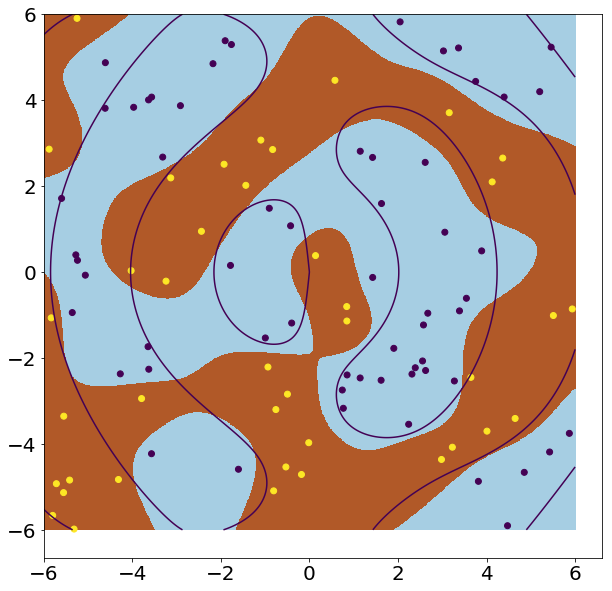

In [61]:
#generate points
N = 100
ps = (np.random.rand(N,2)-.5)*12
labels= f(ps[:,0],ps[:,1])
svc=SVC(C=1e10)
labels[labels>0]=1
labels[labels<=0]=-1

# flip 3% of labels
idx = np.random.choice(labels.shape[0],np.int(labels.shape[0]*.03))
labels[idx] *= -1 

labels = labels.astype(np.int)
svc.fit(ps,labels.astype(np.int))

df=svc.decision_function(XY).reshape(X.shape)

plt.pcolormesh(X, Y, df>0, cmap=plt.cm.Paired)
plt.contour(X, Y, f(X,Y), levels=[0])


plt.scatter(ps[:,0],ps[:,1],c=labels)
# plt.colorbar()

In [62]:
def score(svc,verbose=True):
    X,Y=np.meshgrid(np.linspace(-6,6,100),np.linspace(-6,6,100))
    XY=np.array([X.flatten(),Y.flatten()]).T
    df=svc.decision_function(XY).reshape(X.shape)
    sc = np.sum(to_label(f(X,Y))==to_label(df))/(df.shape[0]*df.shape[1])
    if verbose:
        print(sc)
    return sc


In [63]:


C_range = np.logspace(-2, 7, 10)
gamma_range = np.logspace(-7, 5, 13)
out_mat = np.zeros([gamma_range.shape[0],C_range.shape[0]])

N_avg = 1
for n in range(N_avg):
    N_train = [100,200][np.random.randint(0,2)]
    print(n)
    for i,g in enumerate(gamma_range):

        for j,C in enumerate(C_range):
            # gen trainging points
            x_train = (np.random.rand(N_train,2)-.5)*12
            labels = to_label(f(x_train[:,0],x_train[:,1]))
            idx = np.random.choice(labels.shape[0],np.int(labels.shape[0]*.03))
            labels[idx] *= -1 
            labels=labels.astype(np.int)
            svc = SVC(kernel='rbf',C=C,gamma=g)
            svc.fit(x_train,labels)
            out_mat[i,j] += score(svc,verbose=False)
out_mat /= N_avg

0


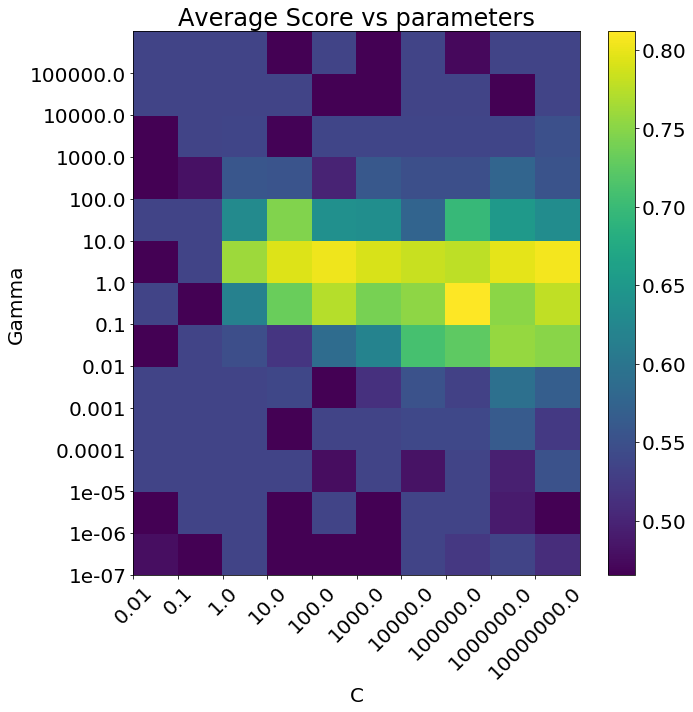

In [64]:
plt.pcolor(out_mat)
plt.colorbar()
plt.yticks(np.arange(len(gamma_range)), gamma_range)
plt.xticks(np.arange(len(C_range)), C_range, rotation=45)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Average Score vs parameters')
plt.show()

#### Ok, better explore gamma 1-10 region more closely 

In [65]:


C_range_detail = np.logspace(-1, 5, 7)
gamma_range_detail = np.linspace(0.01, 10, 20)
out_mat_detail = np.zeros([gamma_range_detail.shape[0],C_range_detail.shape[0]])

N_avg = 5
for n in range(N_avg):
    N_train = [100,200][np.random.randint(0,2)]
    print(n)
    for i,g in enumerate(gamma_range_detail):
        for j,C in enumerate(C_range_detail):
            # gen trainging points
            x_train = (np.random.rand(N_train,2)-.5)*12
            labels = to_label(f(x_train[:,0],x_train[:,1]))
            idx = np.random.choice(labels.shape[0],np.int(labels.shape[0]*.03))
            labels[idx] *= -1 
            labels=labels.astype(np.int)
            svc = SVC(kernel='rbf',C=C,gamma=g)
            svc.fit(x_train,labels)
            out_mat_detail[i,j] += score(svc,verbose=False)
out_mat_detail /= N_avg

0
1
2
3
4


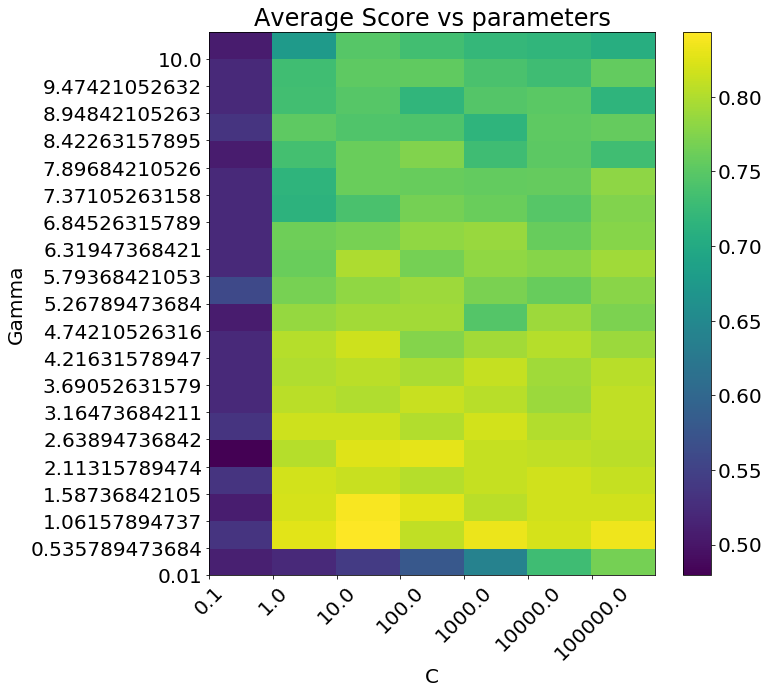

In [66]:
plt.pcolor(out_mat_detail)
plt.colorbar()
plt.yticks(np.arange(len(gamma_range_detail)), gamma_range_detail)
plt.xticks(np.arange(len(C_range_detail)), C_range_detail, rotation=45)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Average Score vs parameters')
plt.show()

### Refining the search range again + more averages

In [67]:
C_range_detail2 = np.logspace(-.5, 3, 20)
gamma_range_detail2 = np.linspace(0.05, 4, 50)
out_mat_detail2 = np.zeros([gamma_range_detail2.shape[0],C_range_detail2.shape[0]])

N_avg = 4
for n in range(N_avg):
    N_train = [100,200][np.random.randint(0,2)]
    print(n)
    for i,g in enumerate(gamma_range_detail2):
#         print('\t{:}'.format(i))
        for j,C in enumerate(C_range_detail2):
            # gen trainging points
            x_train = (np.random.rand(N_train,2)-.5)*12
            labels = to_label(f(x_train[:,0],x_train[:,1]))
            idx = np.random.choice(labels.shape[0],np.int(labels.shape[0]*.03))
            labels[idx] *= -1 
            labels=labels.astype(np.int)
            svc = SVC(kernel='rbf',C=C,gamma=g)
            svc.fit(x_train,labels)
            out_mat_detail2[i,j] += score(svc,verbose=False)
out_mat_detail2 /= N_avg

0
1
2
3


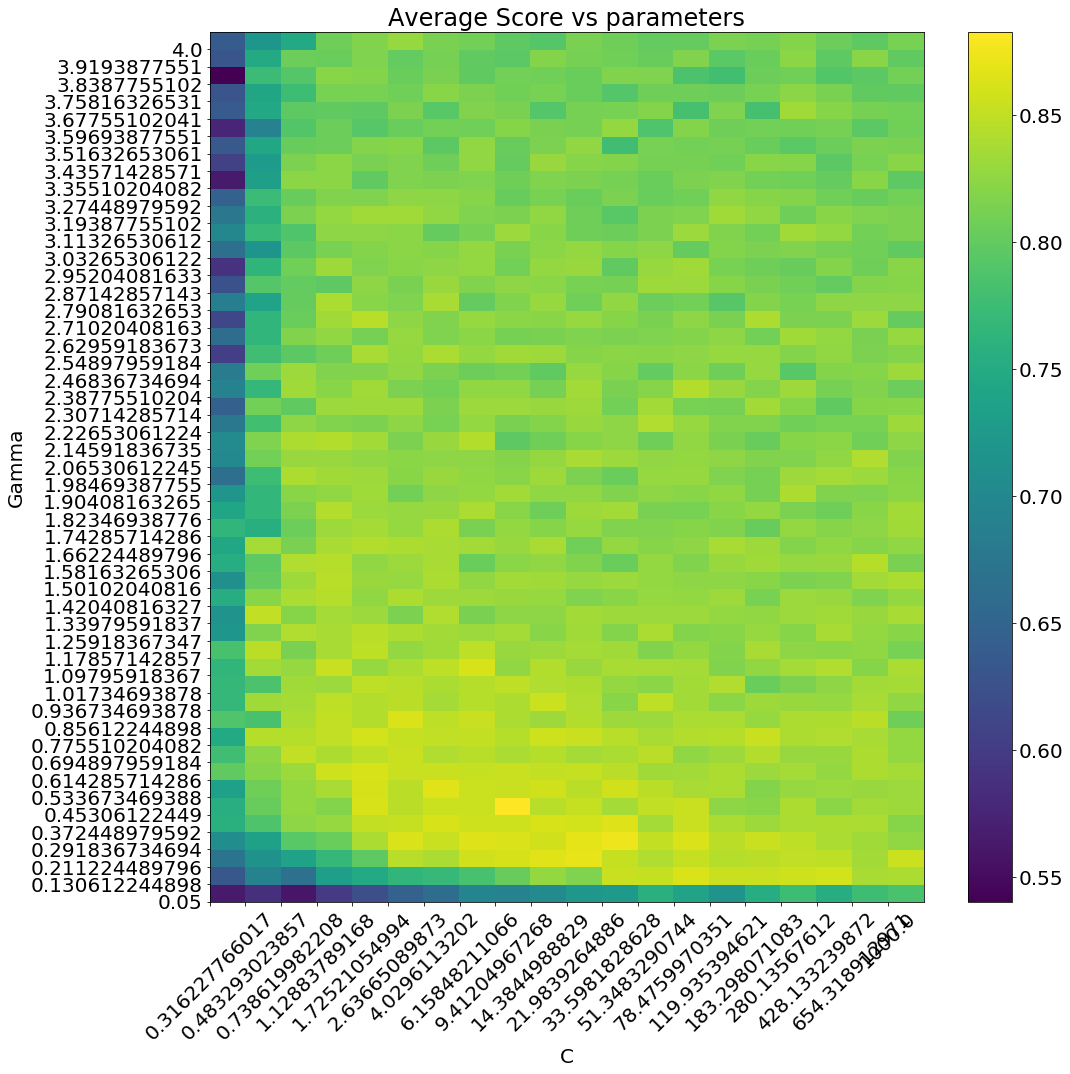

In [68]:
plt.figure(figsize=(16,16))
plt.pcolor(out_mat_detail2)
plt.colorbar()
plt.yticks(np.arange(len(gamma_range_detail2)), gamma_range_detail2)
plt.xticks(np.arange(len(C_range_detail2)), C_range_detail2, rotation=45)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Average Score vs parameters')
plt.show()

In [69]:
idx = np.unravel_index(np.argmax(out_mat_detail2, axis=None), out_mat_detail2.shape)
print(idx)
print(gamma_range_detail2[idx[0]])
print(C_range_detail2[idx[1]])
print(out_mat_detail2[idx])

(5, 8)
0.45306122449
9.41204967268
0.882825


In [70]:
print(out_mat_detail2[1,2])
out_mat_detail2[1,6]

0.667275


0.76972499999999999

In [71]:


C_range_detail3 = np.linspace(.31, 50, 20)
gamma_range_detail3 = np.linspace(0.05, 1.5, 20)
out_mat_detail3 = np.zeros([gamma_range_detail3.shape[0],C_range_detail3.shape[0]])

N_avg = 10
for n in range(N_avg):
    N_train = [100,200][np.random.randint(0,2)]
    print(n)
    for i,g in enumerate(gamma_range_detail3):
        for j,C in enumerate(C_range_detail3):
            # gen trainging points
            x_train = (np.random.rand(N_train,2)-.5)*12
            labels = to_label(f(x_train[:,0],x_train[:,1]))
            svc = SVC(kernel='rbf',C=C,gamma=g)
            svc.fit(x_train,labels)
            out_mat_detail3[i,j] += score(svc,verbose=False)
out_mat_detail3 /= N_avg

0
1
2
3
4
5
6
7
8
9


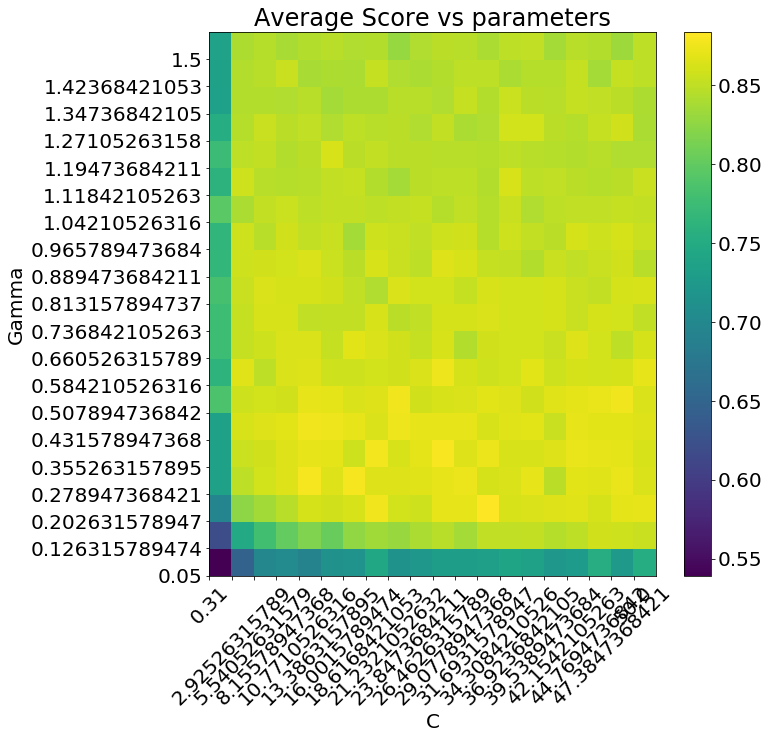

In [72]:
plt.pcolor(out_mat_detail3)
plt.colorbar()
plt.yticks(np.arange(len(gamma_range_detail3)), gamma_range_detail3)
plt.xticks(np.arange(len(C_range_detail3)), C_range_detail3, rotation=45)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Average Score vs parameters')
plt.show()

In [73]:
idx = np.unravel_index(np.argmax(out_mat_detail3, axis=None), out_mat_detail3.shape)
print(idx)
print(gamma_range_detail3[idx[0]])
print(C_range_detail3[idx[1]])
print(out_mat_detail3[idx])

(2, 12)
0.202631578947
31.6931578947
0.88388
